In [78]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [46]:
# Load datasets and clear, save full dataset

In [47]:
df_fake = pd.read_csv("datasets/fake_news/Fake.csv")

In [48]:
df_true = pd.read_csv("datasets/fake_news/True.csv")

In [49]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [50]:
df_fake = df_fake.drop(columns=["subject", "date", "text"], axis=1)

In [51]:
df_true = df_true.drop(columns=["subject", "date", "text"], axis=1)

In [52]:
df_true["result"] = 1
df_fake["result"] = 0

In [53]:
df_full = pd.concat([df_fake, df_true], ignore_index=True)

In [54]:
df_full.to_csv("fake_true.csv")

In [55]:
# Clear text and vectorize it

In [56]:
df = pd.read_csv("datasets/fake_news/fake_true.csv")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44898 non-null  int64 
 1   title       44898 non-null  object
 2   result      44898 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [58]:
df = df.drop("Unnamed: 0", axis=1)

In [59]:
df

,title,result
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,1
44894,LexisNexis withdrew two products from Chinese ...,1
44895,Minsk cultural hub becomes haven from authorities,1
44896,Vatican upbeat on possibility of Pope Francis ...,1


([<matplotlib.patches.Wedge at 0x1fabb4b4610>,
 [Text(-0.6444280942577069, -0.8914664499191096, 'Fake'),
  Text(0.6444280107925915, 0.8914665102548182, 'True')],
 [Text(-0.3515062332314764, -0.4862544272286052, '52.3%'),
  Text(0.3515061877050499, 0.48625446013899165, '47.7%')])

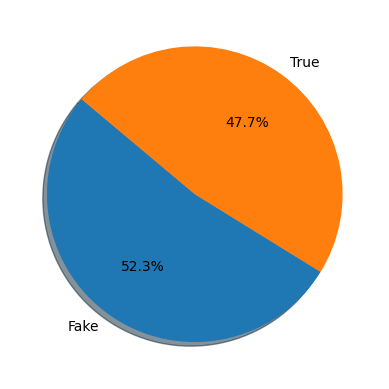

In [60]:
plt.pie(df["result"].value_counts(), labels=["Fake", "True"], startangle=140, autopct='%1.1f%%', shadow=True)

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [88]:
X, y = df["title"], df["result"]

In [89]:
vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, random_state=42, test_size=0.2)

In [91]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.5)

In [92]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("X_valid shape", X_valid.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)
print("y_valid shape", y_valid.shape)

X_train shape (35918, 20896)
X_test shape (4490, 20896)
X_valid shape (4490, 20896)
y_train shape (35918,)
y_test shape (4490,)
y_valid shape (4490,)


In [93]:
# Train models

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
def plot_cm(y_test, y_pred, name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sb.heatmap(cm, annot=True, fmt='d', cmap="BuGn")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Confusion Matrix {name}")
    plt.show()

Multinomial Naive Bayes
Multinomial Naive Bayes Accuracy: 0.9506
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2385
           1       0.96      0.94      0.95      2105

    accuracy                           0.95      4490
   macro avg       0.95      0.95      0.95      4490
weighted avg       0.95      0.95      0.95      4490



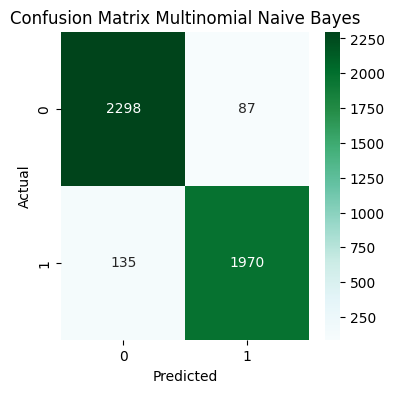

Logistic Regression
Logistic Regression Accuracy: 0.9653
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2385
           1       0.95      0.97      0.96      2105

    accuracy                           0.97      4490
   macro avg       0.96      0.97      0.97      4490
weighted avg       0.97      0.97      0.97      4490



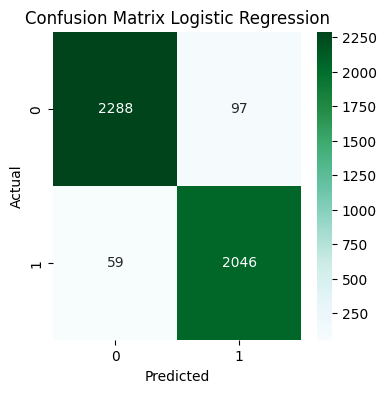

Random Forest
Random Forest Accuracy: 0.9530
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2385
           1       0.95      0.95      0.95      2105

    accuracy                           0.95      4490
   macro avg       0.95      0.95      0.95      4490
weighted avg       0.95      0.95      0.95      4490



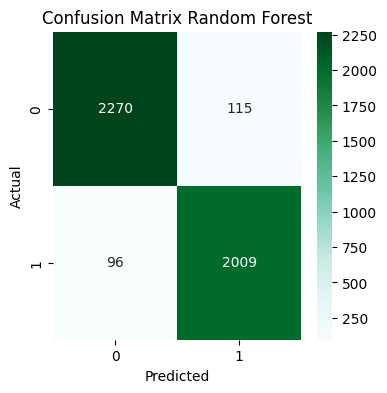

K-Nearest Neighbors
K-Nearest Neighbors Accuracy: 0.7889
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2385
           1       0.74      0.84      0.79      2105

    accuracy                           0.79      4490
   macro avg       0.79      0.79      0.79      4490
weighted avg       0.80      0.79      0.79      4490



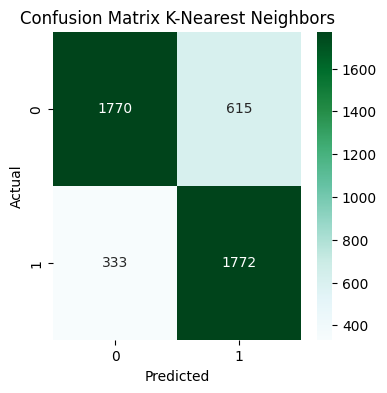

Decision Tree
Decision Tree Accuracy: 0.9185
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2385
           1       0.92      0.91      0.91      2105

    accuracy                           0.92      4490
   macro avg       0.92      0.92      0.92      4490
weighted avg       0.92      0.92      0.92      4490



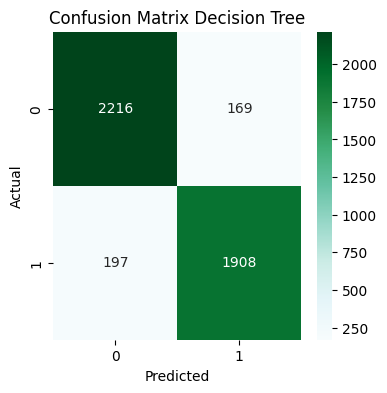

In [96]:
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, model in models.items():
    print(f"{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))  
    plot_cm(y_test, y_pred, name)
    print("="*60)

In [97]:
from tensorflow import keras
from keras.layers import Dense, Dropout

In [104]:
model = keras.Sequential([
    Dense(512, activation="relu", input_shape=(X_train.shape[1], )),
    Dropout(0.2),
    Dense(256, activation="relu"),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

In [105]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 512)                 │      10,699,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,871,809 (41.47 MB)

 Trainable params: 10,871,809 (41.47 MB)

 Non-trainable params: 0 (0.00 B)

In [106]:
early_stop = keras.callbacks.EarlyStopping(patience=1, monitor="val_loss")

In [107]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [108]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid), callbacks=[early_stop])

Epoch 1/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 37s 32ms/step - accuracy: 0.9054 - loss: 0.2141 - val_accuracy: 0.9635 - val_loss: 0.0894
Epoch 2/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 36s 32ms/step - accuracy: 0.9883 - loss: 0.0332 - val_accuracy: 0.9635 - val_loss: 0.0966


In [115]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss = {round(100 * loss, 2)} %")
print(f"Accuracy = {round(100 * accuracy, 2)} %")

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9676 - loss: 0.1000
Loss = 11.02 %
Accuracy = 96.57 %


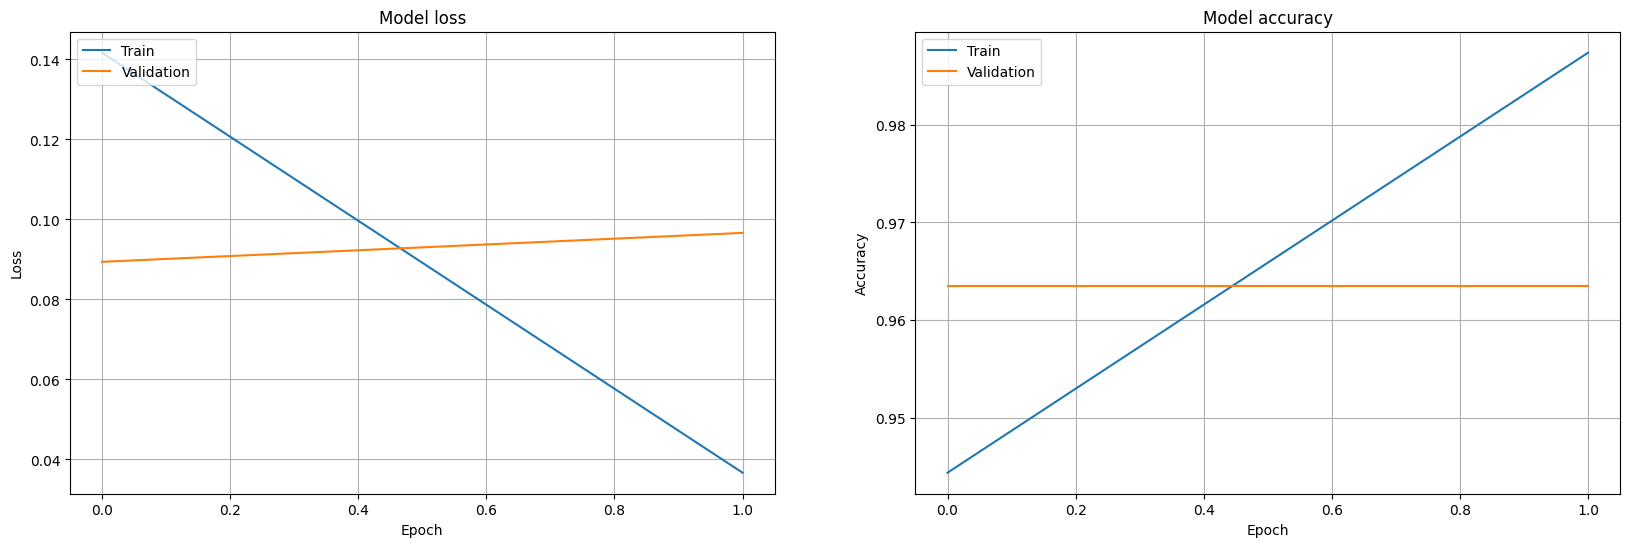

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()